# Chapter 4: Gradient Descent -- Where Magic Happens

New Skills in This Chapter:

• Optimization through grid search

• Finding the optimal value through the gradient descent algorithm

• Choosing the right learning rate in gradient descent

• Using the GradientTape API in TensorFlow to calculate gradients

***
*In view of all that we have said in the foregoing sections, the many obstacles we
appear to have surmounted, what casts the pall over our victory celebration? It is
the curse of dimensionality, a malediction that has plagued the scientist from the
earliest days.*
***
Adaptive Control Processes: A Guided Tour

--Richard Bellman, 1961

***

In [1]:
import os

os.makedirs("files/ch04", exist_ok=True)

# 4.1 Optimization through Grid Search

## 4.1.1 How Grid Search Achieves Optimization
Suppose you want to find the value of $x$ to minimize the value of $y=(x-10)^2$. A brute force approach is to look at many different values of $x$ and see which one leads to the lowest value of $y$.<br> The method is called grid search. The idea is to look at different values in each parameter, and see which combination of parameters leads to the best result. 

In our example, we have only one parameter, $x$. So we look at 2000 different values of $x$ between 0 and 20 and see which value leads to the lowest value of 
$y=(x-10)^2$. 

This can be easily done in Python as follows:

In [2]:
import numpy as np
# Create 2000 different values of x and y
x=np.linspace(0,20,2000)
y=(x-10)**2
# Find out the lowest value of y
min_y = np.min(y)
print(f"the minimum y is {min_y}")
# Find out the optimal value x
argmin_y = np.argmin(y)
print(f"the minimum y is indexed at {argmin_y}")
best_x = x[argmin_y]
print(f"the optimal x is {best_x}")

the minimum y is 2.5025018762497603e-05
the minimum y is indexed at 1000
the optimal x is 10.005002501250624


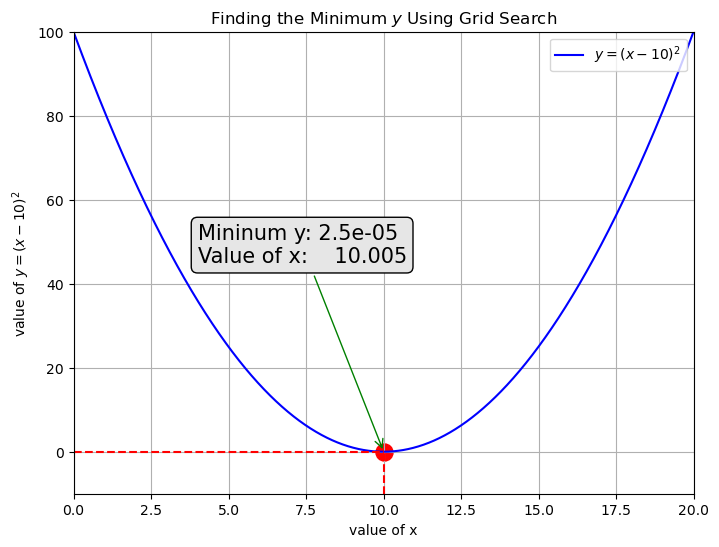

In [3]:
from matplotlib import pyplot as plt

fig=plt.figure(dpi=100,figsize=(8,6))
plt.grid()
plt.plot(x,y,color='blue',label="$y=(x-10)^2$")
plt.scatter(best_x, min_y,color='red',s=150)
plt.plot([0,10],[0,0],color='red',linestyle='dashed')
plt.plot([10,10],[-10,0],color='red',linestyle='dashed')
plt.xlim(0,20)
plt.ylim(-10,100)
plt.xlabel("value of x")
plt.ylabel("value of $y=(x-10)^2$")
plt.title("Finding the Minimum $y$ Using Grid Search")
plt.legend(loc="upper right")
# add text to explain
txt=plt.annotate(
    f'Mininum y: {round(min_y,6)}\nValue of x:\
    {round(best_x,3)}',
    xy=(best_x, min_y),
    xytext=(0.2,0.5),
    textcoords='axes fraction',
    bbox=dict(boxstyle="round", fc="0.9"),
    arrowprops=dict(arrowstyle='->',
        color='g',linewidth = 1),fontsize = 15)

## 4.1.2 Curse of Dimensionality and Directional Grid Search

In [4]:
# randomly selects an initial value of x
x0=1.2345
y0=(x0-10)**2
# how much to adjust the value of x in each iteration
step=0.01
# keep track of the values of x and y
ys=[]
xs=[]
xs.append(x0)
ys.append(y0)
# find the derivative; i.e., gradient
# find the derivative; i.e., gradient
def dydx(x):
    dydx=2*(x-10)
    return dydx
# starts the directional grid search
x=x0
for i in range(1,2001,1):
    # directional grid search
    if dydx(x)>0:
        x=x-step
    else:
        x=x+step
    # calculate the current value of y
    y=(x-10)**2
    # record values of x and y
    xs.append(x)
    ys.append(y)
    # stop if the change is smaller than 0.0001
    if abs(ys[-1]-ys[-2])<=0.0001:
        print(f"find minimum after {i} steps")
        print(f"the minimum y is {ys[-1]}")
        print(f"the optimal x is {xs[-1]}")
        break
    # quit if not converge after 2000 iterations
    else:
        if i==2000:
            print("fail to find the minimum")              
# keep track of values            
min_y = y
argmin_y = i
best_x = x

find minimum after 877 steps
the minimum y is 2.0249999998482748e-05
the optimal x is 10.004499999999831


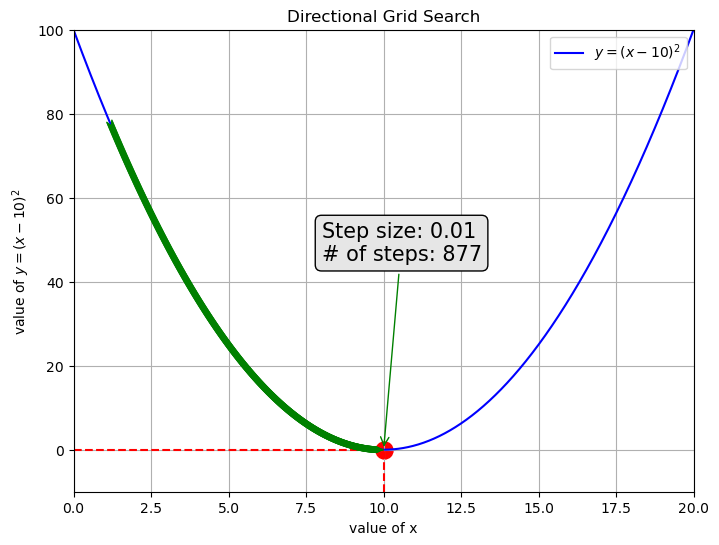

In [5]:
fig, ax=plt.subplots(figsize=(8,6), dpi=100)
plt.grid()
x=np.linspace(0,20,2000)
y=(x-10)**2
ax.plot(x,y,color='blue',label="$y=(x-10)^2$")
plt.scatter(best_x, min_y,color='red',s=150)
ax.plot([0,10],[0,0],color='red',linestyle='dashed')
ax.plot([10,10],[-10,0],color='red',linestyle='dashed')
ax.set_xlim(0,20)
ax.set_ylim(-10,100)
ax.set_xlabel("value of x")
ax.set_ylabel("value of $y=(x-10)^2$")
ax.set_title("Directional Grid Search")
plt.legend(loc="upper right")
# add text to explain 
txt = ax.annotate(
    f'Step size: {step}\n# of steps: {argmin_y}', 
    xy = (best_x, min_y), 
    xytext = (0.4,0.5), 
    textcoords = 'axes fraction', 
    bbox = dict(boxstyle="round", fc="0.9"), 
    arrowprops=dict(arrowstyle = '->',
        color = 'g', linewidth = 1),fontsize = 15)
# Show the path of the directional grid search
for k in range(len(xs)-1):
    ax.annotate("",xy = (xs[k+1], ys[k+1]), 
    xytext = (xs[k], ys[k]), 
    textcoords = 'data', 
    bbox = dict(boxstyle="round", fc="0.9"), 
    arrowprops=dict(arrowstyle='->',color='g',linewidth=1))

# 4.2 Gradient Descent

In [6]:
learning_rate=0.1
# keep track of the values of x and y
ys=[]
xs=[]
xs.append(x0)
ys.append(y0)
# starts the gradient descent
x=x0
for i in range(1,2001,1):
    # gradient descent
    x=x-learning_rate*dydx(x)
    # calculate current value of y
    y=(x-10)**2
    # record values of x and y
    xs.append(x)
    ys.append(y)
    # stop if the change is smaller than 0.0001
    if abs(ys[-1]-ys[-2])<=0.0001:
        print(f"find minimum after {i} steps")
        print(f"the minimum y is {ys[-1]}")
        print(f"the optimal x is {xs[-1]}")
        break
    # if not converge after 2000 iterations, quit
    else:
        if i==2000:
            print("fail to find the minimum")              
# save values            
min_y = y
argmin_y = i
best_x = x

find minimum after 30 steps
the minimum y is 0.0001177477474450676
the optimal x is 9.989148836585644


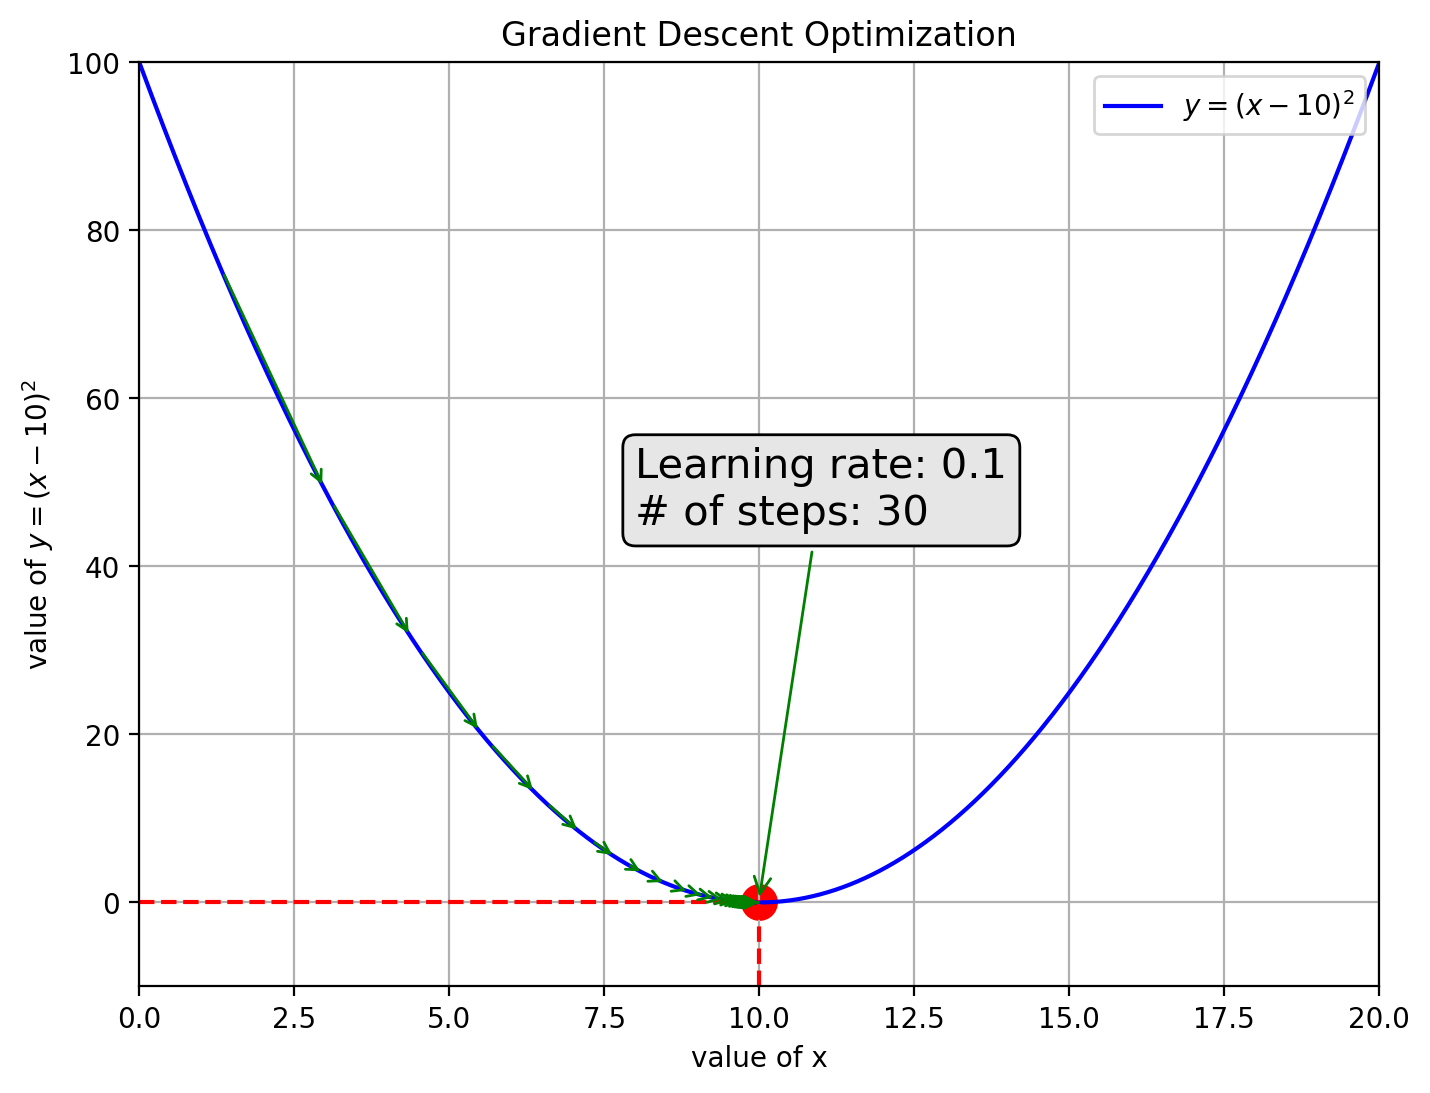

In [7]:
fig, ax=plt.subplots(figsize=(8,6), dpi=200)
plt.grid()
x=np.linspace(0,20,2000)
y=(x-10)**2
ax.plot(x,y,color = 'blue',label="$y=(x-10)^2$")
plt.scatter(best_x, min_y, color = 'red', s=150)
ax.plot([0,10],[0,0],color='red',linestyle='dashed')
ax.plot([10,10],[-10,0],color='red',linestyle='dashed')
ax.set_xlim(0,20)
ax.set_ylim(-10,100)
ax.set_xlabel("value of x")
ax.set_ylabel("value of $y=(x-10)^2$")
ax.set_title("Gradient Descent Optimization")
plt.legend(loc="upper right")
# add text to explain 
txt = ax.annotate(
    f'Learning rate: {learning_rate}\n# of steps: {argmin_y}', 
    xy = (best_x, min_y), 
    xytext = (0.4,0.5), 
    textcoords = 'axes fraction', 
    bbox = dict(boxstyle="round", fc="0.9"), 
    arrowprops=dict(arrowstyle = '->', 
                color = 'g', linewidth = 1), 
    fontsize = 15)
# Show the path of gradient descent
for k in range(len(xs)-1):
    ax.annotate("", xy = (xs[k+1], ys[k+1]), 
    xytext = (xs[k], ys[k]), 
    textcoords = 'data', 
    bbox = dict(boxstyle="round", fc="0.9"), 
    arrowprops=dict(arrowstyle = '->', 
        color = 'g', linewidth = 1))

# 4.3 Use Tensorflow to Calculate Gradients


## 4.3.1 Install Tensorflow

To install the TensorFlow Python library, run the following line of command in
the Anaconda prompt (Windows) or a terminal (Mac or Linux), with your virtual
environment MLA activated:

pip install tensorflow==2.12.0

Or as a shortcut, you can pip install Python libraries in a cell in your Jupyter notebook
ch04.ipynb directly. Remember to put the exclamation mark (!) in front of the
command, as follows:

!pip install tensorflow==2.12.0

## 4.3.2 Calculate Gradients Using Tensorflow

In [8]:
import tensorflow as tf
from IPython.display import Markdown as md

tfx = tf.Variable(2, dtype='float32') 
with tf.GradientTape() as tape:
    ty=(tfx-10)**2
dydx = tape.gradient(ty,tfx).numpy()        
md(f"the gradient of the function \
$y=(x-10)^2$ at $x=2$ is {dydx}")   

the gradient of the function $y=(x-10)^2$ at $x=2$ is -16.0

In [9]:
x=np.linspace(0,20,2001)
y=(x-10)**2
for i in range(2001):
    if x[i]%2==0 and 2<=x[i]<=18:
        tfx = tf.Variable(x[i], dtype='float32') 
        with tf.GradientTape() as tape:
            ty=(tfx-10)**2
        dydx = tape.gradient(ty,tfx).numpy()        
        print(f"the gradient at x={x[i]} is {dydx}")  

the gradient at x=2.0 is -16.0
the gradient at x=4.0 is -12.0
the gradient at x=6.0 is -8.0
the gradient at x=8.0 is -4.0
the gradient at x=10.0 is 0.0
the gradient at x=12.0 is 4.0
the gradient at x=14.0 is 8.0
the gradient at x=16.0 is 12.0
the gradient at x=18.0 is 16.0


##  4.3.3 Gadient Descent Optimization with TensorFlow
We'll revisit the problem of finding the minimum value for $y=(x-10)^2$ at $x=2$. This time, we'll use the ***tensorflow*** library to calculate gradients.

Since we'll do this serveral times with different learning rate, creating a function is more efficient.

In [10]:
def GD(lr):
    x0=1.2345
    y0=(x0-10)**2
    learning_rate = lr
    ys=[]
    xs=[]
    xs.append(x0)
    ys.append(y0)
    x=x0
    for i in range(1,2001,1):
        # gradient descent
        tfx = tf.Variable(x, dtype='float32') 
        with tf.GradientTape() as tape:
            ty=(tfx-10)**2
        dydx = tape.gradient(ty,tfx).numpy()      
        x=x-learning_rate*dydx
        # calculate current value of y
        y=(x-10)**2
        # record values of x and y
        xs.append(x)
        ys.append(y)
        # if the change is smaller than 0.0001, stop
        if abs(ys[-1]-ys[-2])<=0.0001:
            print(f"find minimum after {i} steps")
            print(f"the minimum y is {ys[-1]}")
            print(f"the optimal x is {xs[-1]}")
            break
        # if y not converge after 2000 steps, quit
        else:
            if i==2000:
                print("fail to find the minimum")              
    return y, i, x, xs, ys

Now we call the function, and using a learning rate of 0.1.

In [11]:
min_y, argmin_y, best_x, xs, ys = GD(0.1)

find minimum after 30 steps
the minimum y is 0.0001177468879359246
the optimal x is 9.989148876190185


We find exactly the same results as before. Here the only difference is that we have used a different way of calculating gradients. 

## 4.3.4 Animate the Optimization Process

Next, we'll create an animation of the intermediate steps of the gradient descent optimization algorithm we just used. 

Again, since we'll perform the same animation with different learning rate, we'll create a function for it.

In [12]:
def draw(prefix, lr, xs, ys):
    x_points=np.linspace(0,20,2000)
    y_points=(x_points-10)**2
    for i in range(30):
        xsi, ysi = xs[:i+2], ys[:i+2]
        fig, ax=plt.subplots(figsize=(8,6), dpi=100)
        plt.grid()     
        ax.plot(x_points,y_points,color='b',label="$y=(x-10)^2$")
        plt.scatter(xsi[-1], ysi[-1],color ='red',s=150)
        ax.plot([0,10],[0,0],color='red',linestyle='dashed')
        ax.plot([10,10],[-10,0],color='red',linestyle='dashed')
        ax.set_xlim(0,20)
        ax.set_ylim(-10,100)
        ax.set_xlabel("value of x", fontsize=12)
        ax.set_ylabel("value of $y=(x-10)^2$",fontsize=12)
        ax.set_title(f"Gradient Descent with lr={lr}",fontsize=16)
        plt.legend(loc="upper right", fontsize=15)
        # add text to explain 
        txt = ax.annotate(
            f'''Learning rate: {lr}''', 
            xy = (xsi[-1], ysi[-1]), 
            xytext = (0.64,0.1), fontsize=12,
            textcoords = 'axes fraction', 
            bbox = dict(boxstyle="round", fc="0.9"))
        txt = ax.annotate(
            f'''Step {i+1}\nx = {round(xsi[-1],5)}''', 
            xy = (xsi[-1], ysi[-1]), 
            xytext = (0.4,0.8), 
            textcoords = 'axes fraction', 
            bbox = dict(boxstyle="round", fc="0.9"), 
            arrowprops=dict(arrowstyle = '->', 
                color = 'm', linewidth = 1), 
            fontsize = 15)
        # Show the path of gradient descent
        for k in range(len(xsi)-1):
            ax.annotate("",xy = (xs[k+1], ys[k+1]), 
            xytext = (xs[k], ys[k]), 
            textcoords = 'data', 
            bbox = dict(boxstyle="round", fc="0.9"), 
            arrowprops=dict(arrowstyle = '->',
                color = 'g', linewidth = 1))  
        fig.savefig(f"files/ch04/{prefix}{i}.png") 
        plt.close(fig)

In [13]:
draw("lr_medium", 0.1, xs, ys)

Next, we combine the png files into an animation.

In [14]:
import PIL, imageio

def gif(prefix):
    frames=[]
    for i in range(30):
        frame=PIL.Image.open(f"files/ch04/{prefix}{i}.png") 
        frame=np.asarray(frame)
        frames.append(np.array(frame))
    imageio.mimsave(f'files/ch04/{prefix}.gif', frames, duration=200)

In [15]:
gif("lr_medium")

The animation effect can be viewed as follows:

<img src="https://gattonweb.uky.edu/faculty/lium/ml/lr_good.gif" />

# 4.4 Choose the Right Learning Rate

## 4.4.1 When the Learning Rate Is Too Large

In [16]:
min_y, argmin_y, best_x, xs, ys = GD(0.95)

find minimum after 58 steps
the minimum y is 0.0003781253706990058
the optimal x is 9.980554553985598


In [17]:
draw("lr_large", 0.95, xs, ys)

In [18]:
gif("lr_large")

<img src="https://gattonweb.uky.edu/faculty/lium/ml/lr_large.gif" />

## 4.4.2 When the Learning Rate Is Too Small

In [19]:
min_y, argmin_y, best_x, xs, ys = GD(0.001)

fail to find the minimum


In [20]:
draw("lr_small", 0.001, xs, ys)

warning: it takes several minutes to generate all the pictures. 

In [21]:
gif("lr_small")


<img src="https://gattonweb.uky.edu/faculty/lium/ml/lr_small.gif" />

# 4.5 Compare Learning Rates

## 4.5.1 Combine Animations

First, we open the 30 pictures when the learning rate is small. We then store the pictures as numpy arrays in a list called smalls, like so:

In [22]:
smalls=[]
for i in range(30):
    frame=PIL.Image.open(\
    f"files/ch04/lr_small{i}.png") 
    frame=np.asarray(frame)
    smalls.append(np.array(frame))

Next, we open the 30 pictures when the learning rate is medium. We store the pictures as numpy arrays in a list called mediums. Similarly, the 30 pictures when the learning rate is large are stored in a list called larges, like so:

In [23]:
mediums=[]
for i in range(30):
    frame=PIL.Image.open(\
     f"files/ch04/lr_medium{i}.png") 
    frame=np.asarray(frame)
    mediums.append(np.array(frame))
larges=[]    
for i in range(30):
    frame=PIL.Image.open(\
     f"files/ch04/lr_large{i}.png") 
    frame=np.asarray(frame)
    larges.append(np.array(frame))

In each of the 30 stages of training, we use the concatenate() method in numpy to combine the three frames side by side horizontally. The combined frames are stored in a list frames. The following cell accomplished that:

In [24]:
frames=[]
for i in range(30):
    frame=np.concatenate([larges[i],mediums[i],smalls[i]],axis=1) 
    frames.append(np.array(frame))

Finally, we use the minsave() method in imageio to convert the 30 frames into an animation in gif format, like so:

In [25]:
imageio.mimsave('files/ch04/lrs.gif',frames,duration=200) 


<img src="https://gattonweb.uky.edu/faculty/lium/ml/largetosmall.gif" />

## 4.5.2 Subplots of Different Stages

In [26]:
stacked=np.concatenate([frames[0],frames[9],\
            frames[19],frames[29]],axis=0) 

The list stacked now has 12 pictures in it, with three different learning rates and four different stages. 

Next, we'll use matplotlib.pyplot to create a figure with the 12 pictures as subplots, like so:

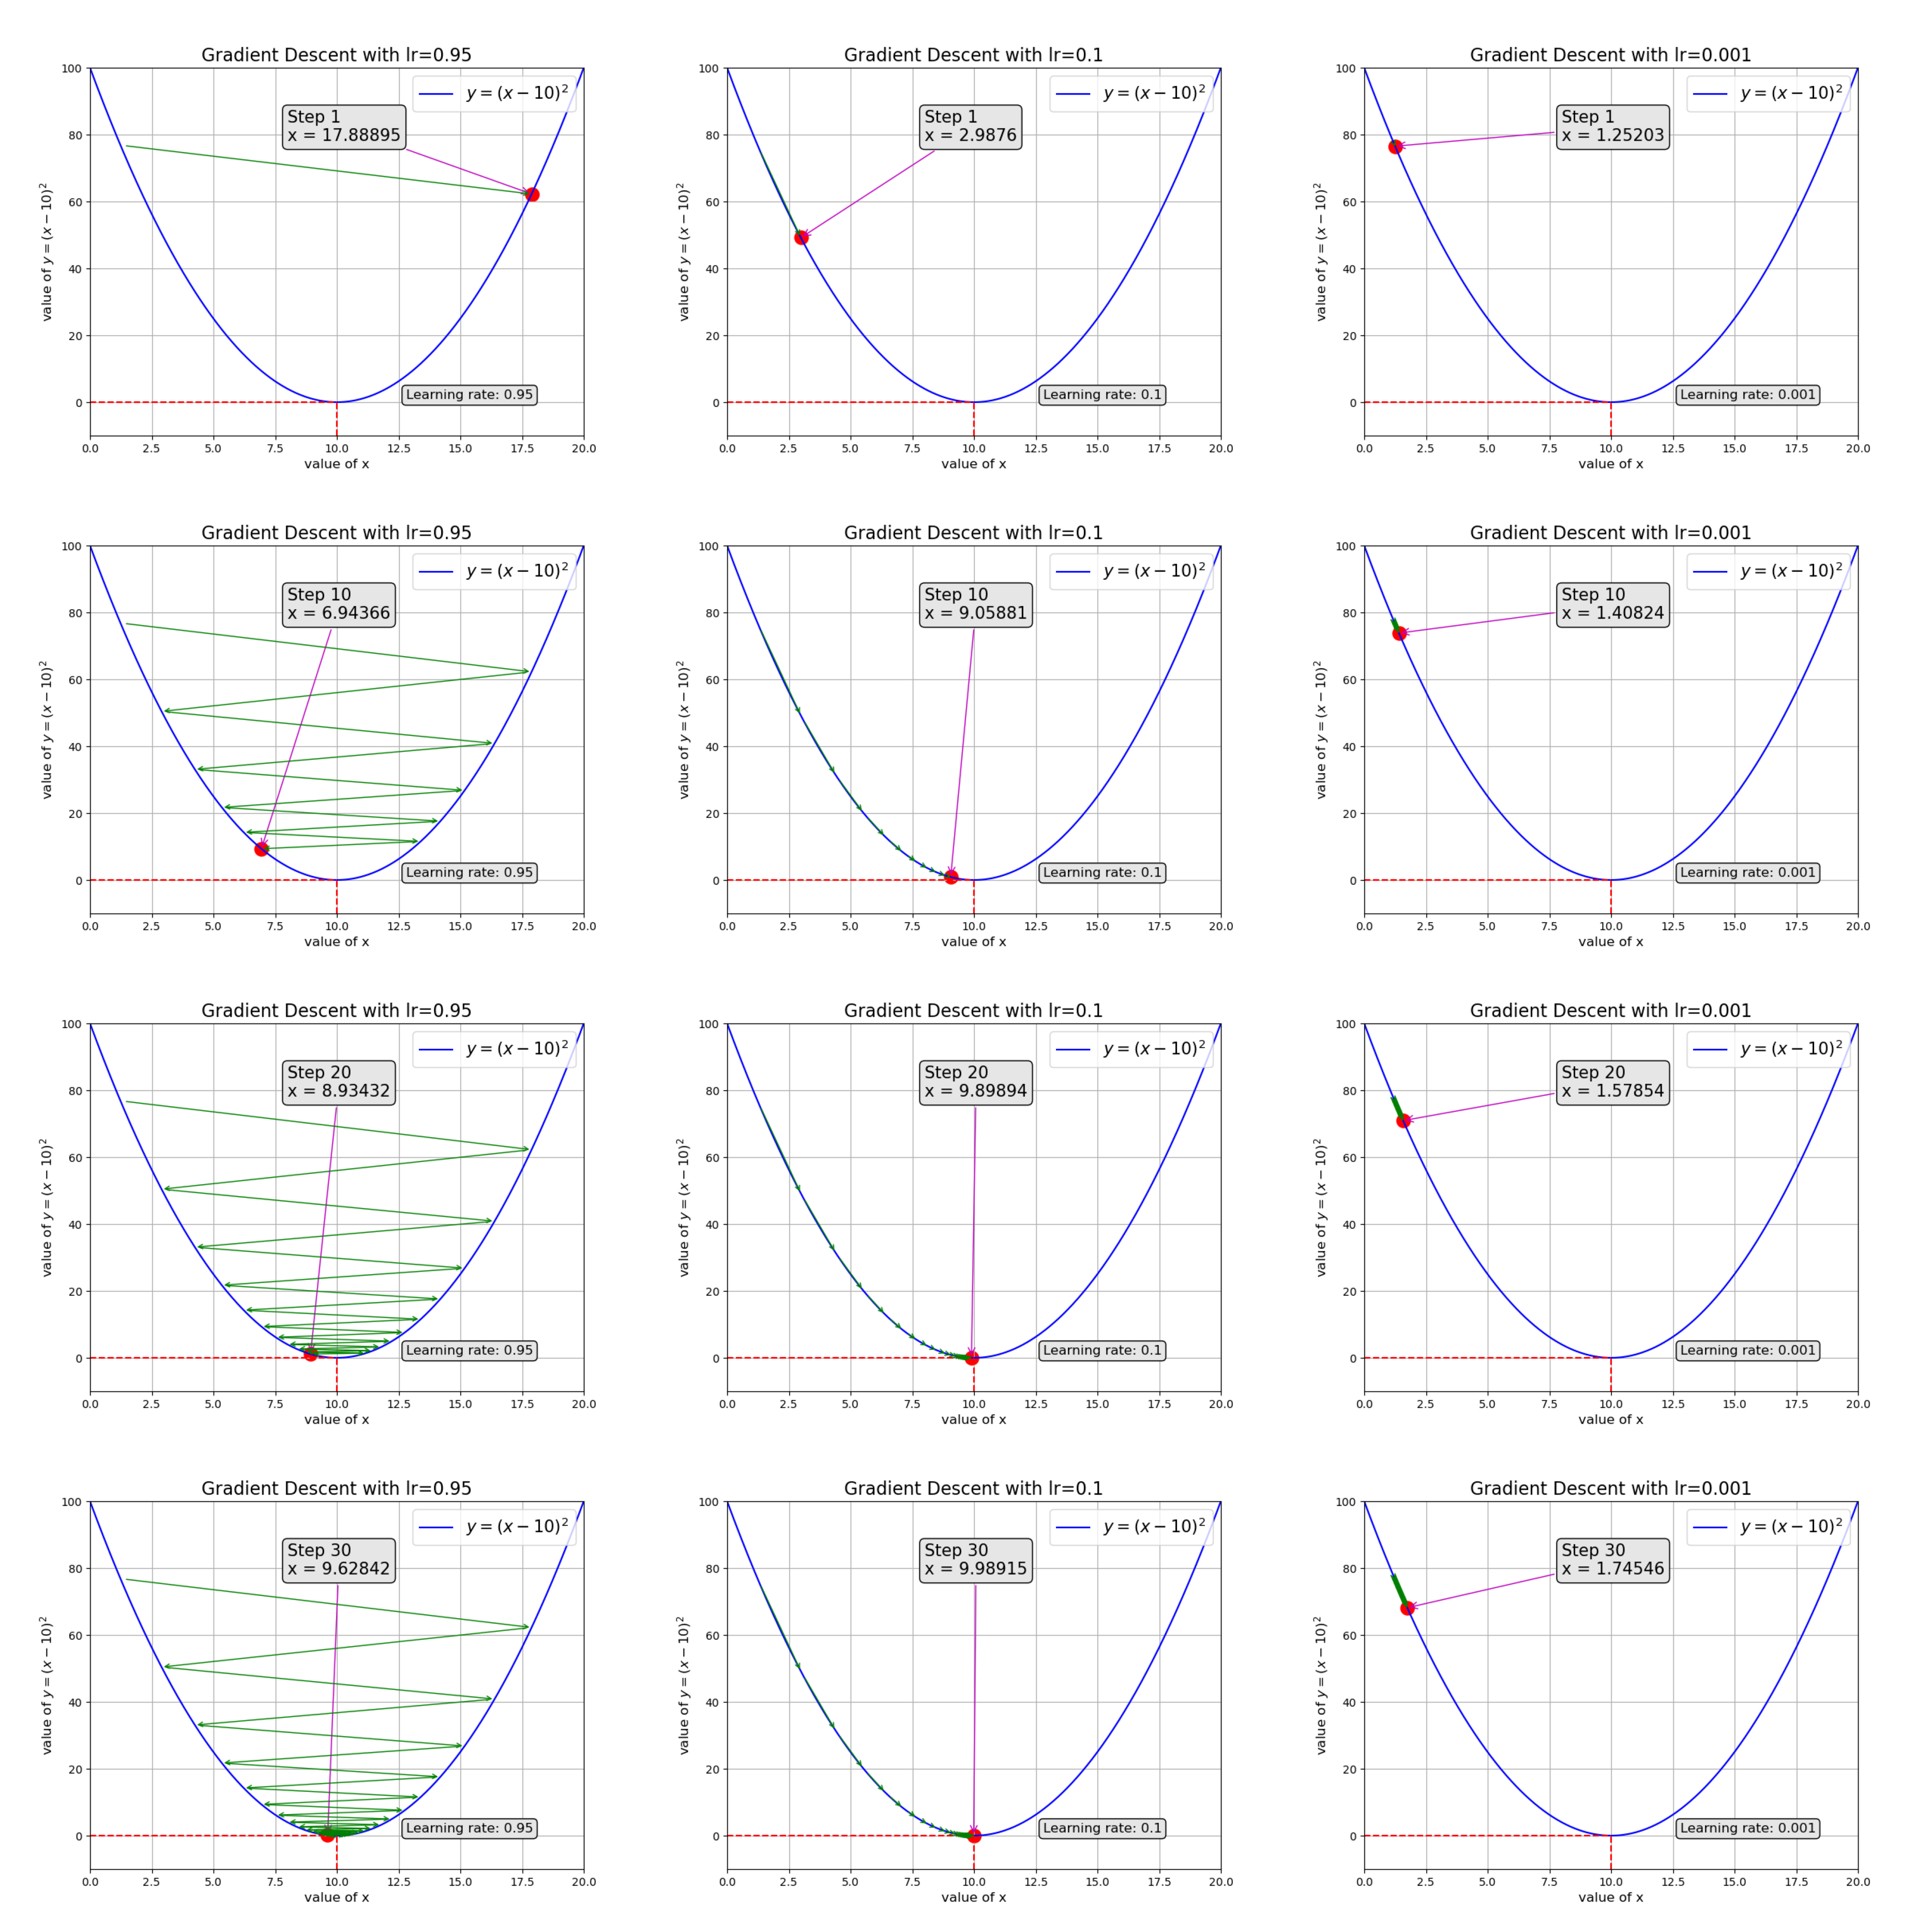

In [27]:
fig=plt.figure(dpi=200,figsize=(24,24))
plt.imshow(stacked)
plt.axis('off')
plt.show()

## 4.7 Exercises

In [28]:
# Answer to question 4.2

# Create 2000 different values of x and y
x=np.linspace(0,8,1000)
y=np.cos(x)
# Find out the lowest value of y
min_y = np.min(y)
print(f"the minimum y is {min_y}")
# Find out the optimal value x
argmin_y = np.argmin(y)
print(f"the minimum y is indexed at {argmin_y}")
best_x = x[argmin_y]
print(f"the optimal x is {best_x}")

the minimum y is -0.9999969901349302
the minimum y is indexed at 392
the optimal x is 3.139139139139139


find minimum after 877 steps
the minimum y is 2.0249999998482748e-05
the optimal x is 10.004499999999831


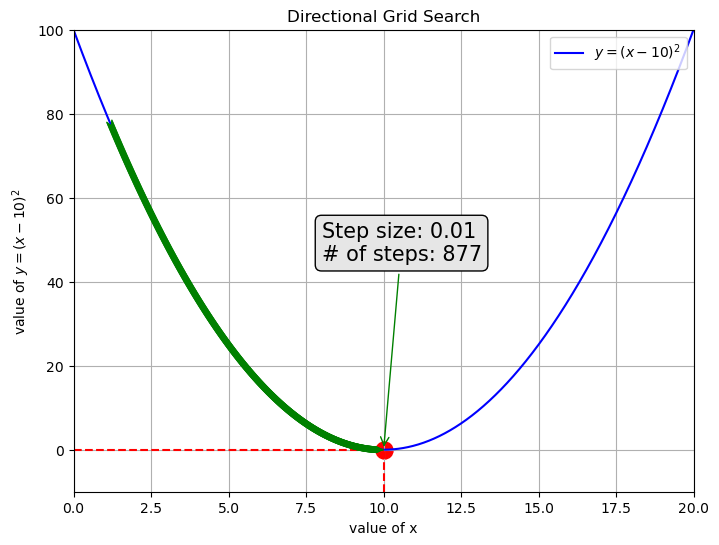

In [29]:
# Answer to question 4.5

# randomly selects an initial value of x
x0=1.2345
y0=(x0-10)**2
# how much to adjust the value of x in each iteration
step=0.01
# keep track of the values of x and y
ys=[]
xs=[]
xs.append(x0)
ys.append(y0)
# find the derivative; i.e., gradient
# find the derivative; i.e., gradient
def dydx(x):
    dydx=2*(x-10)
    return dydx
# starts the directional grid search
x=x0
for i in range(1,2001,1):
    # directional grid search
    if dydx(x)>0:
        x=x-step
    else:
        x=x+step
    # calculate the current value of y
    y=(x-10)**2
    # record values of x and y
    xs.append(x)
    ys.append(y)
    # stop if the change is smaller than 0.0001
    if abs(ys[-1]-ys[-2])<=0.0001:
        print(f"find minimum after {i} steps")
        print(f"the minimum y is {ys[-1]}")
        print(f"the optimal x is {xs[-1]}")
        break
    # quit if not converge after 2000 iterations
    else:
        if i==2000:
            print("fail to find the minimum")              
# keep track of values            
min_y = y
argmin_y = i
best_x = x

fig=plt.figure(figsize=(8,6), dpi=100)
plt.grid()
x=np.linspace(0,20,2000)
y=(x-10)**2
plt.plot(x,y,color='blue',label="$y=(x-10)^2$")
plt.scatter(best_x, min_y,color='red',s=150)
plt.plot([0,10],[0,0],color='red',linestyle='dashed')
plt.plot([10,10],[-10,0],color='red',linestyle='dashed')
plt.xlim(0,20)
plt.ylim(-10,100)
plt.xlabel("value of x")
plt.ylabel("value of $y=(x-10)^2$")
plt.title("Directional Grid Search")
plt.legend(loc="upper right")
# add text to explain 
txt = plt.annotate(
    f'Step size: {step}\n# of steps: {argmin_y}', 
    xy = (best_x, min_y), 
    xytext = (0.4,0.5), 
    textcoords = 'axes fraction', 
    bbox = dict(boxstyle="round", fc="0.9"), 
    arrowprops=dict(arrowstyle = '->',
        color = 'g', linewidth = 1),fontsize = 15)
# Show the path of the directional grid search
for k in range(len(xs)-1):
    plt.annotate("",xy = (xs[k+1], ys[k+1]), 
    xytext = (xs[k], ys[k]), 
    textcoords = 'data', 
    bbox = dict(boxstyle="round", fc="0.9"), 
    arrowprops=dict(arrowstyle='->',color='g',linewidth=1))

In [30]:
# Answer to question 4.6
import numpy as np

x0=1
y0=np.cos(x0)
def dydx(x):
    return -np.sin(x)
learning_rate=0.1
# keep track of the values of x and y
ys=[]
xs=[]
xs.append(x0)
ys.append(y0)
# starts the gradient descent
x=x0
for i in range(1,2001,1):
    # gradient descent
    x=x-learning_rate*dydx(x)
    # calculate current value of y
    y=np.cos(x)
    # record values of x and y
    xs.append(x)
    ys.append(y)
    # stop if the change is smaller than 0.0001
    if abs(ys[-1]-ys[-2])<=0.001:
        print(f"find minimum after {i} steps")
        print(f"the minimum y is {ys[-1]}")
        print(f"the optimal x is {xs[-1]}")
        break
    # if not converge after 2000 iterations, quit
    else:
        if i==2000:
            print("fail to find the minimum")              
# save values            
min_y = y
argmin_y = i
best_x = x

find minimum after 36 steps
the minimum y is -0.996015324455521
the optimal x is 3.052291761845511


In [31]:
# Answer to question 4.7
x0=1
y0=np.cos(x0)
learning_rate=0.1
ys=[]
xs=[]
xs.append(x0)
ys.append(y0)
x=x0
for i in range(1,2001,1):
    # gradient descent
    tfx = tf.Variable(x, dtype='float32') 
    with tf.GradientTape() as tape:
        ty=tf.math.cos(tfx)
    dydx = tape.gradient(ty,tfx).numpy()      
    x=x-learning_rate*dydx
    # calculate current value of y
    y=np.cos(x)
    # record values of x and y
    xs.append(x)
    ys.append(y)
    # if the change is smaller than 0.0001, stop
    if abs(ys[-1]-ys[-2])<=0.001:
        print(f"find minimum after {i} steps")
        print(f"the minimum y is {ys[-1]}")
        print(f"the optimal x is {xs[-1]}")
        break
    # if y not converge after 2000 steps, quit
    else:
        if i==2000:
            print("fail to find the minimum")    

find minimum after 36 steps
the minimum y is -0.9960153245432154
the optimal x is 3.052291762828828
